In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-rhy7zidw
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-rhy7zidw'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=Cy3 --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing Cy3_20230206_B2-10_01.tif
Done analyzing Cy3_20230206_B2-11_01.tif
Done analyzing Cy3_20230206_B2-12_01.tif
Done analyzing Cy3_20230206_B2-13_01.tif
Done analyzing Cy3_20230206_B2-14_01.tif
Done analyzing Cy3_20230206_B2-15_01.tif
Done analyzing Cy3_20230206_B2-16_01.tif
Done analyzing Cy3_20230206_B2-1_01.tif
Done analyzing Cy3_20230206_B2-2_01.tif
Done analyzing Cy3_20230206_B2-3_01.tif
Done analyzing Cy3_20230206_B2-4_01.tif
Done analyzing Cy3_20230206_B2-5_01.tif
Done analyzing Cy3_20230206_B2-6_01.tif
Done analyzing Cy3_20230206_B2-7_01.tif
Done analyzing Cy3_20230206_B2-8_01.tif
Done analyzing Cy3_20230206_B2-9_01.tif
Done analyzing Cy3_20230206_B3-10_01.tif
Done analyzing Cy3_20230206_B3-11_01.tif
Done analyzing Cy3_20230206_B3-12_01.tif
Done analyzing Cy3_20230206_B3-13_01.tif
Done analyzing Cy3_20230206_B3-14_01.tif
Done analyzing Cy3_20230206_B3-15_01.tif
Done analyzing Cy3_20230206_B3-16_01.tif
Done analyzing Cy3

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
imaq_4h=pd.read_csv('Cy3/2023-02-07_PyIQ_output/19-46-33_PyIQ_analyze_out.csv')
imaq_4h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
283,Cy3\Cy3_20230206_B8-2_01.tif,0.553609,636503.0,2.475437,214.347759,2.720621,4.871501,2.270810e+09,214.306459,-0.200059,...,0.241925,0.005922,0.994078,0.929158,0.943048,0.014623,0.297592,0.089307,0.314598,0.021529
284,Cy3\Cy3_20230206_D8-2_01.tif,0.523095,614683.0,2.359771,207.218833,2.582726,4.989110,2.270810e+09,206.864376,0.027316,...,0.233878,0.005622,0.994378,0.951589,0.992224,0.007137,0.287258,0.086426,0.303814,0.020523
285,Cy3\Cy3_20230206_B7-12_01.tif,0.829749,578938.0,2.642007,184.444810,2.252242,5.221401,2.270810e+09,184.238204,0.002654,...,0.208174,0.004902,0.995098,0.995895,0.999244,0.014068,0.255839,0.077284,0.286146,0.022977
286,Cy3\Cy3_20230206_D7-9_01.tif,0.519204,533816.0,1.978695,175.838629,2.130376,5.076363,2.270810e+09,175.574038,0.160898,...,0.198461,0.004637,0.995363,0.968232,0.954196,0.000305,0.243807,0.074065,0.263844,0.017209
287,Cy3\Cy3_20230206_D7-5_01.tif,1.000704,509817.0,1.814696,148.831807,2.036629,5.091842,2.270810e+09,149.234325,0.267895,...,0.167980,0.004433,0.995567,0.971184,0.923736,0.014065,0.207231,0.062407,0.251982,0.015782


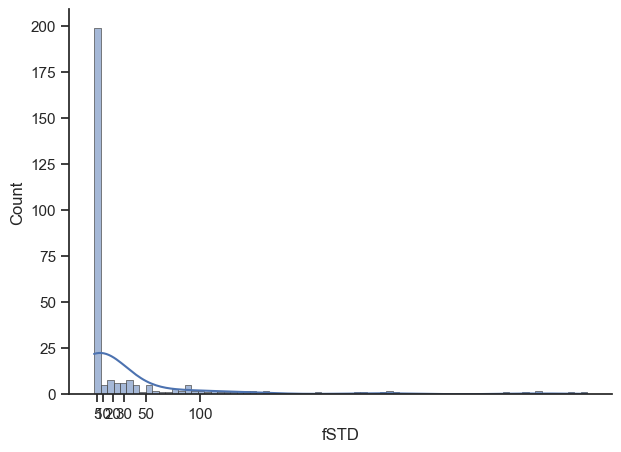

In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_4h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5, 10, 20, 30, 50, 100])

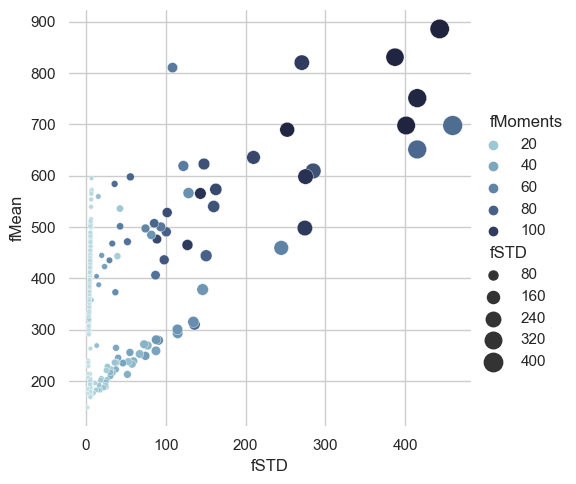

In [10]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=imaq_4h,
    x="fSTD", y="fMean",
    hue="fMoments", size="fSTD",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [6]:
imaq_4h_sel=imaq_4h[imaq_4h['fSTD']<3]

In [7]:
imaq_4h_sel.Filename.count()

8

In [8]:
imaq_4h_sel.to_csv('Cy3_20230206_CHOK1_HeLa_24h_filterOut.csv', sep=";") 